In [1]:
%matplotlib inline
import tensorflow as tf
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.examples.tutorials.mnist import input_data

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(20, 20))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

In [2]:
import pymysql
import pandas as pd
#connect to db
db = pymysql.connect("localhost", "root", "hhxxttxs", "test")

caching sha2: Trying full auth...
-----BEGIN PUBLIC KEY-----
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAvrD2SBoni+y2EOFapv0l
8Zr4Og1pKoFPyI2xK8RMXFLP7QFVlnjQF2oItSifXugv9gn+s3EclzsDwemkXMpA
8nWqLoyjmxPwoLW5+Yy9KhoiDezeuwwYkdUnGj0xQHZvbFOhaROrP77K/PYX3Erv
O4aTq5jGbIwH8fWjNhFzzUgYQujOkP4A7MsFEPWqU8DYBiiKRbAYARkF6bzjtAZW
myCMEZk0xtgFMTEGGXJBmPOi03IRlEBPS87yBKj+vyUZ3DXTZ5ij79m5HpOAMmo1
4ESwxiaprZA5Y/lJ/rwB+ezyWnhqV1xS0rhLLp63eupuW6ZgUEARJyG6+WGoUJh0
OQIDAQAB
-----END PUBLIC KEY-----



In [3]:
sql = "select * from model1600"
df = pd.read_sql(sql, con=db)

In [4]:
db.close()

In [6]:
model_1600 = df.copy()

In [172]:
for i in range(len(df)):
    model_1600.iat[i,6] = np.frombuffer(df.iat[i,6],dtype=np.float32)
    model_1600.iat[i,7] = np.frombuffer(df.iat[i,7],dtype=np.float32)
    model_16002000.iat[i,8] = np.frombuffer(df.iat[i,8],dtype=np.float32)

In [174]:
dens2 = model_1600['dens2'].tolist()
dens2 = np.array(dens2)

In [175]:
dens1 = model_1600['dens1'].tolist()
dens1 = np.array(dens1)

In [176]:
flat = model_1600['flat'].tolist()
flat = np.array(flat)

In [179]:
dens2.shape

(2115, 200)

In [180]:
action = model_1600['action'].tolist()
action = np.array(action)

In [181]:
action.shape

(2115,)

In [182]:
action[action<400] = 3
action[np.logical_and((action>=400) ,(action<500))] = 4
action[np.logical_and((action>=500) ,(action<600))] = 5
action[np.logical_and((action>=600) ,(action<700))] = 6
action[np.logical_and((action>=700) ,(action<800))] = 7
action[action>=800] = 8

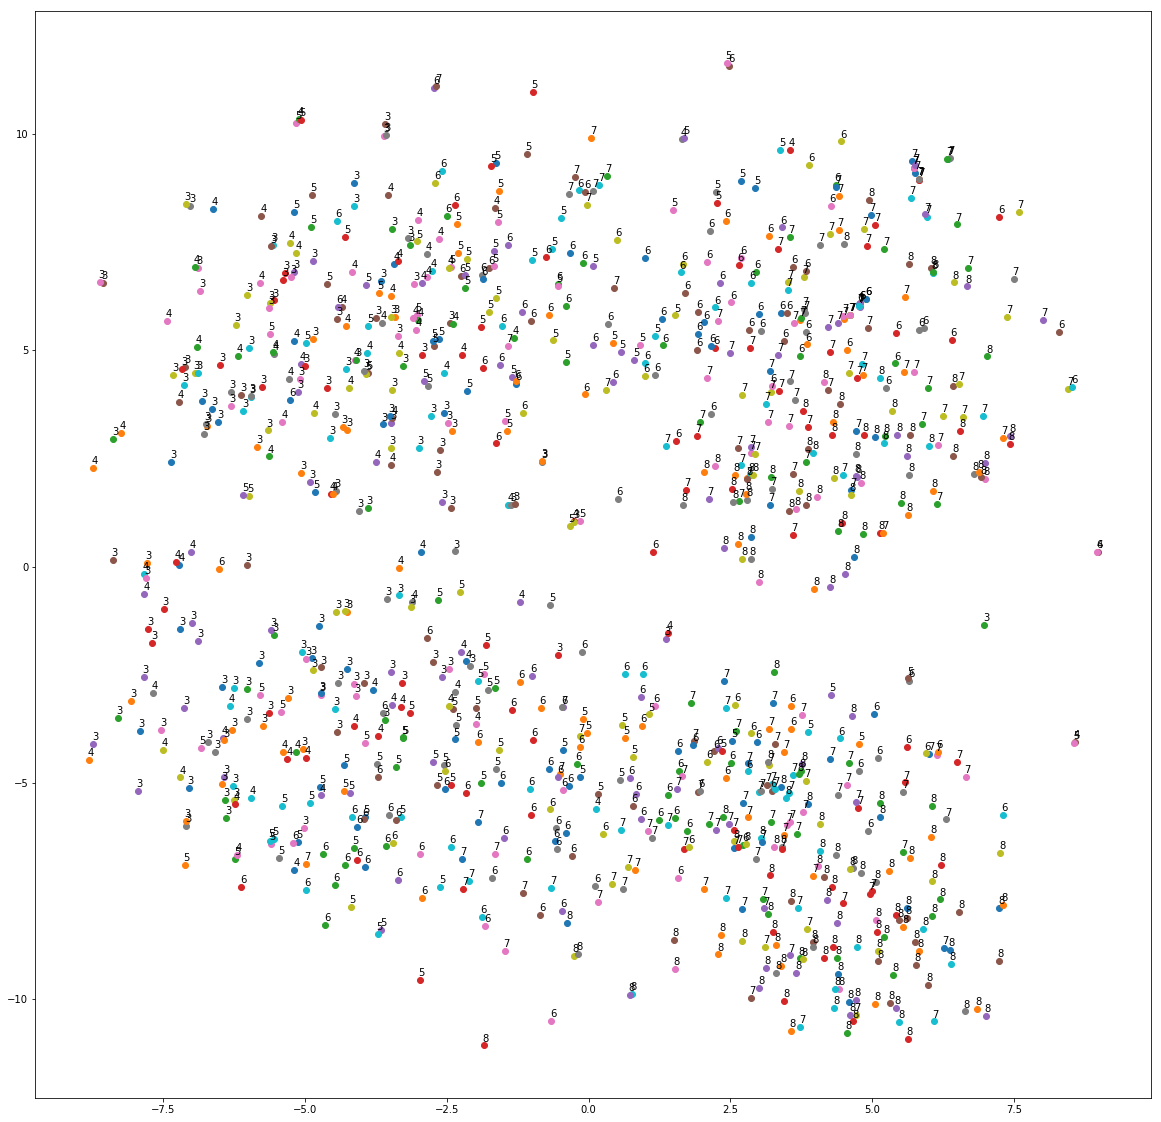

In [208]:
tsne = TSNE(perplexity=150, n_components=2, init='pca', n_iter=10000)
lowDWeights = tsne.fit_transform(flat[0:1000])
labels = action[0:1000]
# plot_with_labels(lowDWeights, labels, 'model2000_flat.png')

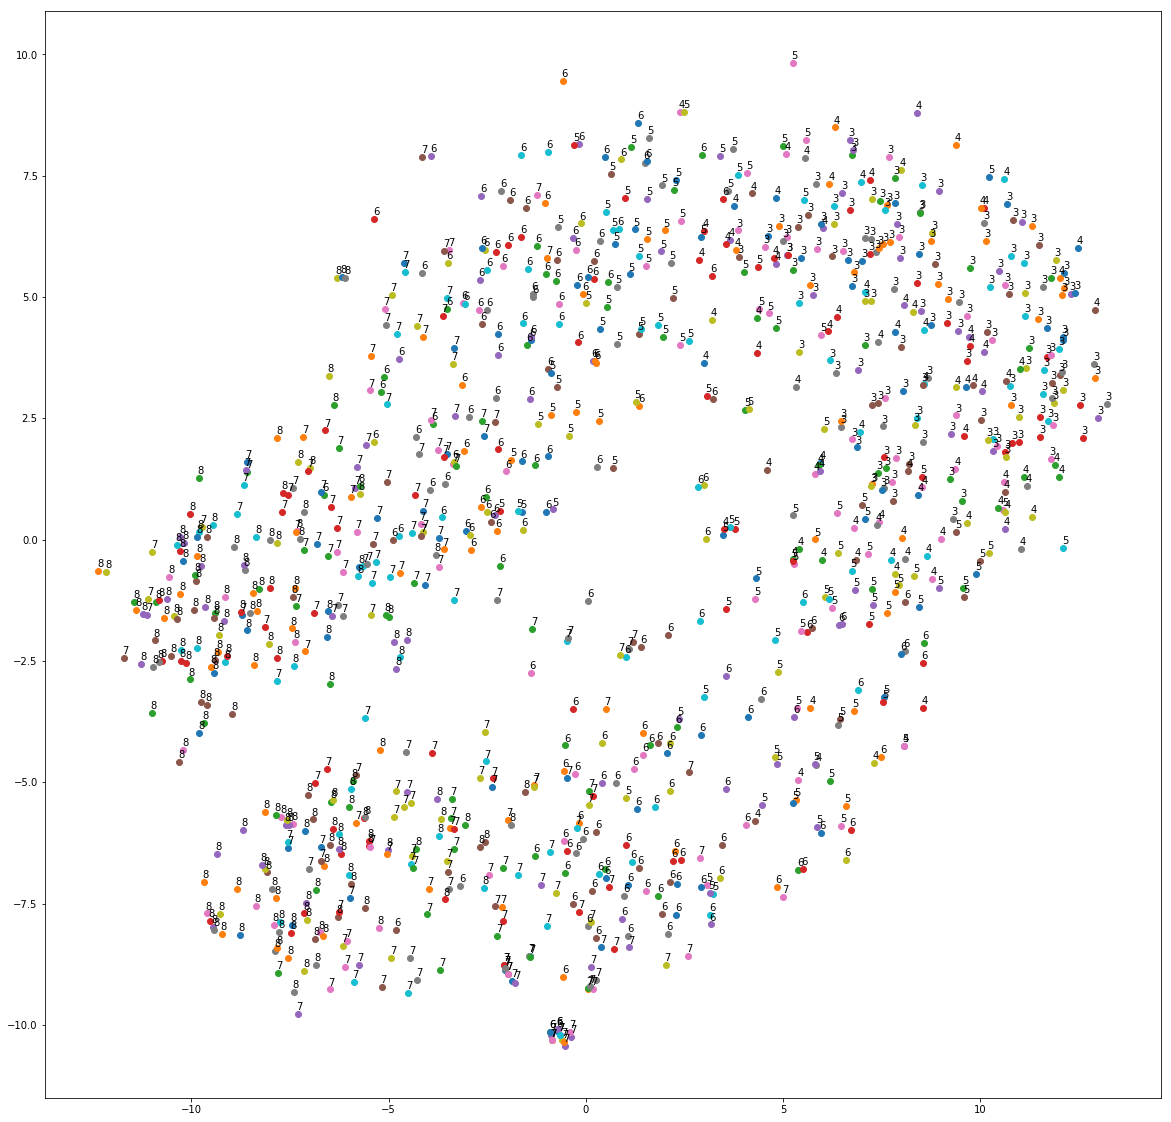

In [187]:
tsne = TSNE(perplexity=150, n_components=2, init='pca', n_iter=10000)
lowDWeights = tsne.fit_transform(dens2[0:1000])
labels = action[0:1000]
plot_with_labels(lowDWeights, labels, 'model2000_dens2.png')

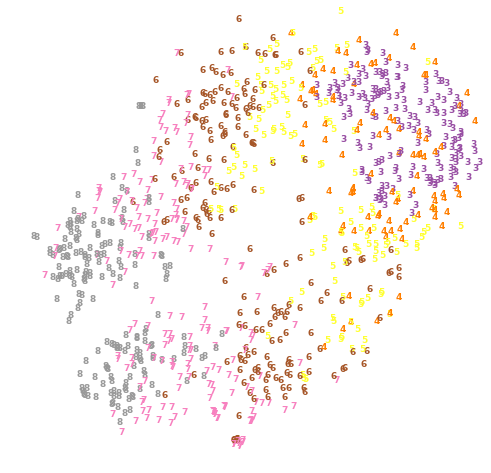

In [214]:
'''t-SNE'''
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = dens2_tsne
y = action

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.axis('off')

plt.savefig('model2000_dens2.pdf')

plt.show()

In [185]:
# dens2_tsne = lowDWeights

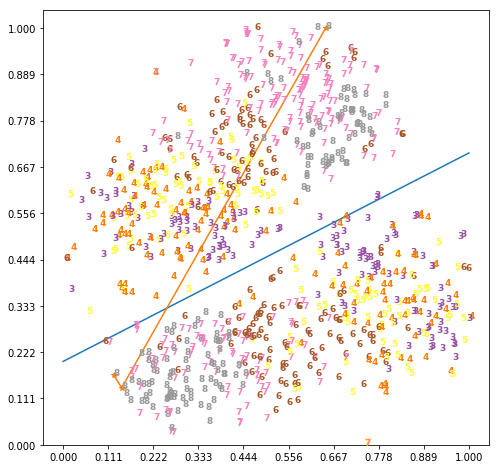

In [162]:
'''t-SNE'''
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = flat_tsne
y = action

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})

plt.plot([0.2,0.7])
# plt.plot([1,2,3],[4,5,6],'ro')
plt.plot([0.6471033,0.1442789,0.12439366],[1, 0.1368937, 0.16725785],marker='o')

plt.xticks(np.linspace(0, 1, 10))
plt.yticks(np.linspace(0, 1, 10))
plt.show()

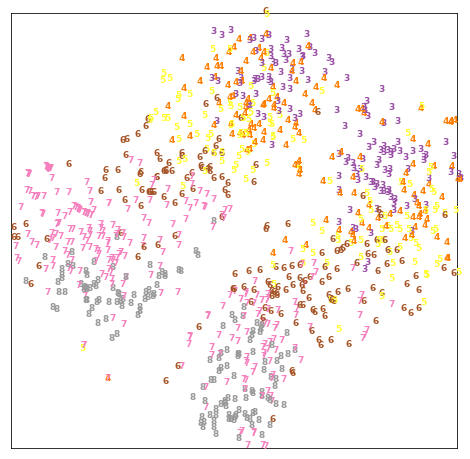

In [116]:
'''t-SNE'''
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = lowDWeights
y = action

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

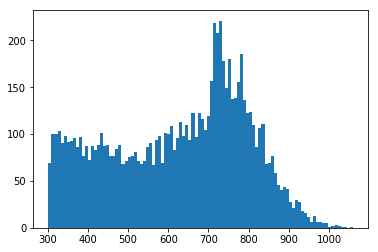

In [86]:
plt.hist(action, bins = 100)
plt.show()

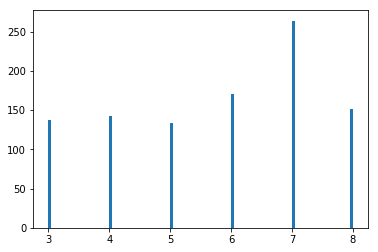

In [100]:
plt.hist(action[0:1000], bins = 100)
plt.show()